In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 
import math as m

In [59]:
# this is a function used for plotting gaussian distributions
def gaussian(input_vector_x,mean,variance):
    return np.exp(-(1/(2*variance))*(input_vector_x-mean)**2)*(2*m.pi*variance)**(-1/2)

## Probability of a Girl Birth Given Placenta Previa (p. 37 - 38)

Here I replicate the last figure in figure 2.3, the posterior density for the sex ratio using simulation:

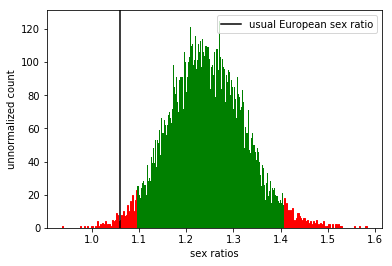

In [5]:
theta = np.random.beta(437+1,980-437+1,size=10000) # uniform prior b/c of principle of insufficient reason
sex_ratio = (1-theta)/theta # male to female sex ratio
n,bins,patches = plt.hist(sex_ratio,bins=300,density=False,color='g');
plt.ylabel('unnormalized count');
plt.xlabel('sex ratios');
plt.axvline(1.06,label='usual European sex ratio',color='k');
plt.legend();
plt.setp([p for p,b in zip(patches,bins) if b>=np.sort(sex_ratio)[int(np.ceil(0.975*10000+1))]],color='r'); # above 97.5 percentile as red
plt.setp([p for p,b in zip(patches,bins) if b<=np.sort(sex_ratio)[int(np.ceil(0.025*10000+1))]],color='r'); # below 2.5 percentile as red

The green portion indicates a 95% posterior interval. Since the usual sex ratio falls in the critical region, we have two possible conclusions. The first option is that the data recorded for the usual European sex ratio was an unlikely occurence and it doesn't reflect the true sex ratio. The second option is that the usual European sex ratio is low for a reason -- because for placenta previa births, the proportion of male births are naturally higher than that of female births. Occam's Razor tells us to choose the option that sounds more likely which is the latter.

## Estimating Normal Mean with Known Variance (p. 39 - 42)

Here I graph the predictive posterior 95% central interval (given previous data points) for a standard normal random sample (graphed in a "time series" form). I also graph the posterior distribution for $\mu$ to visually see how confident the model is. In addition to the information presented in the specified page range, I have incorporated some additional math. Note that given past data points $y$ (this is a vector; using Gelman's notation), the predictive posterior density for a future data point $\tilde{y}$ (not a vector) is:

$$p(\tilde{y}|y) = \int p(\tilde{y}|\theta)p(\theta|y)\text{d}\theta \propto \int \exp\left(-\frac{1}{2\sigma^2}(\tilde{y}-\theta)^2\right)\exp\left(-\frac{1}{2\tau_{n}^2}(\theta-\mu_n)^2\right)\text{d}\theta$$

Likewise in the single data point example, 
$$\mathrm{E}(\tilde{y}|y) = \mathrm{E}(\mathrm{E}(\tilde{y}|y,\theta)|y) = \mathrm{E}(\theta|y) = \mu_n$$
and
$$\mathrm{var}(\tilde{y}|y) = \mathrm{E}(\mathrm{var}(\tilde{y}|\theta,y)|y) + \mathrm{var}(\mathrm{E}(\tilde{y}|y,\theta)|y) = \mathrm{E}(\sigma^2 | y) + \mathrm{var}(\theta|y) = \sigma^2 + \tau_{n}^2$$

so the posterior predictive distribution has those mean and variance parameters. Feel free to tweak ``original_prior_mean`` and ``size``

Our best guess for the mean given the data (from a bayesian paradigm) is now 0.07074413035636395
Our best guess for the mean given the data (from a frequentist paradigm) is now 0.06997994412421851
The actual mean is 0


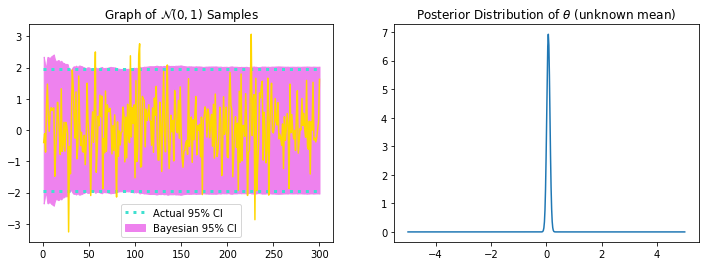

In [62]:
sigma_squared = 1 # this part is known
original_prior_mean, original_prior_variance = 0.3, 1 # lets guess that the mean is 0.3, prior variance we known is 1
size = 300 # size of the random sample

y = np.random.normal(size=size) # random standard normal sample
actual_95_CI = scipy.stats.norm.ppf(0.975) # critical value for 95% ci (we only need one due to symmetry)
t = np.arange(1,len(y)+1) # I called this the input vector (vector of x coords)


# starting here, it reflects the math done above
posterior_mean = ((original_prior_mean/original_prior_variance)+(np.cumsum(y)/sigma_squared))/((1/original_prior_variance)+(np.arange(1,len(y)+1)/sigma_squared))
posterior_variance = 1/((1/original_prior_variance)+(np.arange(1,len(y)+1)/sigma_squared))

predictive_posterior_mean = posterior_mean
predictive_posterior_variance = sigma_squared + posterior_variance
bayesian_95_CI = scipy.stats.norm(loc=predictive_posterior_mean,scale=predictive_posterior_variance**(1/2)).ppf(0.975)
# ending here, it reflects the math done above



fig, ax = plt.subplots(1, 2,figsize=(12,4)) 
ax[0].plot([0,len(y)],[-actual_95_CI,-actual_95_CI],color='turquoise',linestyle=':',linewidth=3,label='Actual 95% CI'); # actual lower CI
ax[0].plot([0,len(y)],[actual_95_CI,actual_95_CI],color='turquoise',linestyle=':',linewidth=3); # actual upper CI
ax[0].plot(t,y,color='gold'); # plot sample
ax[0].fill_between(t,-bayesian_95_CI,bayesian_95_CI,color='violet',label='Bayesian 95% CI'); # bayesian CI
ax[0].set_title(r'Graph of $\mathcal{N}(0,1)$ Samples')
ax[0].legend()
ax[1].plot(np.linspace(-5,5,500),gaussian(np.linspace(-5,5,500),posterior_mean[-1],posterior_variance[-1]))
ax[1].set_title(r'Posterior Distribution of $\theta$ (unknown mean)')


print('Our best guess for the mean given the data (from a bayesian paradigm) is now',predictive_posterior_mean[-1])
print('Our best guess for the mean given the data (from a frequentist paradigm) is now',np.mean(y))
print('The actual mean is',0)

## Estimating Normal Variance with Known Mean (p. 42 - 43)

Here I repeat the same graphs as I did previously, except I do it for the unknown variance case. This goes a bit beyond what the book had to offer, which is why I derive below the posterior predictive distribution:

$$p(\tilde{y}|y) = \int p(\tilde{y}|\theta)p(\theta|y)\text{d}\theta = \int \frac{1}{\sqrt{2\pi \sigma^2}}\exp\left(-\frac{(\tilde{y}-\theta)^2}{2\sigma^2}\right)\frac{\left(\frac{n+\nu_0}{2}\right)^{\left(\frac{n+\nu_0}{2}\right)}}{\Gamma\left(\frac{n+\nu_0}{2}\right)}\left(\sqrt{\frac{\nu_{0}\sigma_{0}^2 + nv}{\nu_0 + n}}\right)^{n+\nu_0}
\left(\frac{1}{\sigma^2}\right)^{\left(\frac{n+\nu_0}{2}\right)+1}
\exp\left(-\frac{1}{2\sigma^2}(\nu_{0}\sigma_{0}^2 + nv)\right)\text{d}\sigma^2$$

Note that, since the sampling distribution inside the integrand is based on one observation $\tilde{y}$, the $nv$ inside the exponential just becomes $(\tilde{y}-\theta)^2$. Again, I adopt the functional forms of these distributions from the table of distributions showcased on p. 576-577. Proceeding, notice that the integrand is proportional to the following:

$$\propto \int_{0}^{\infty}\left(\frac{1}{\sigma^2}\right)^{\left(\frac{n+\nu_0 + 1}{2}\right)+1}
\exp\left(-\frac{1}{2\sigma^2}((\tilde{y}-\theta)^2 + \nu_{0}\sigma_{0}^2 + nv)\right)
\text{d}\sigma^2 
= \overbrace{\left(\frac{(\tilde{y}-\theta)^2 + \nu_{0}\sigma_{0}^2 + nv}{2}\right)^{-\left(\frac{n+\nu_0 + 1}{2}\right)}}^{\beta^{-\alpha}}\overbrace{\Gamma\left(\frac{n+\nu_0 + 1}{2}\right)}^{\Gamma(\alpha)}\overbrace{\int_{0}^{\infty}\text{Inv-}\Gamma\left(\alpha,\beta\right)\text{d}\sigma^2}^{=1}$$

Therefore, our posterior predicitive distribution can be written as:

$$p(\tilde{y}|y) = \frac{1}{\sqrt{2\pi}}\left(\frac{(\tilde{y}-\theta)^2 + \nu_{0}\sigma_{0}^2 + nv}{2}\right)^{-\left(\frac{n+\nu_0 + 1}{2}\right)}\frac{\Gamma\left(\frac{n+\nu_0 + 1}{2}\right)}{\Gamma\left(\frac{n+\nu_0}{2}\right)}\left(\frac{\nu_{0}\sigma_{0}^2 + nv}{2}\right)^{\left(\frac{n+\nu_0}{2}\right)}$$

or rewritten as: 

$$\frac{1}{\sqrt{2\pi}}\left(\frac{2}{\nu_{0}\sigma_{0}^2 + nv}\right)^{1/2}\frac{\Gamma\left(\frac{n+\nu_0 + 1}{2}\right)}{\Gamma\left(\frac{n+\nu_0}{2}\right)}\left(\frac{2}{\nu_{0}\sigma_{0}^2 + nv}\right)^{-\left(\frac{n+\nu_0 + 1}{2}\right)}\left(\frac{(\tilde{y}-\theta)^2 + \nu_{0}\sigma_{0}^2 + nv}{2}\right)^{-\left(\frac{n+\nu_0 + 1}{2}\right)}$$

$$= \frac{1}{\sqrt{\pi(\nu_{0}\sigma_{0}^2 + nv)}}\frac{\Gamma\left(\frac{n+\nu_0 + 1}{2}\right)}{\Gamma\left(\frac{n+\nu_0}{2}\right)}\left(\frac{(\tilde{y}-\theta)^2}{\nu_{0}\sigma_{0}^2 + nv}+1\right)^{-\left(\frac{n+\nu_0 + 1}{2}\right)}$$

... or rewritten as...

$$= \frac{\Gamma\left(\frac{n+\nu_0 + 1}{2}\right)}{\Gamma\left(\frac{n+\nu_0}{2}\right)}\frac{1}{\sqrt{\pi(n+\nu_0)\frac{\nu_{0}\sigma_{0}^2 + nv}{n+ \nu_0}}}\left(1+\frac{1}{n+\nu_0}\left(\frac{\tilde{y}-\theta}{\sqrt{\frac{\nu_{0}\sigma_{0}^2 + nv}{n+\nu_0}}}\right)^2\right)^{-\left(\frac{n+\nu_0 + 1}{2}\right)}$$

Which reveals that this posterior predictive distribution is actually a [non-standardized Student's t-distribution](https://en.wikipedia.org/wiki/Student's_t-distribution#In_terms_of_scaling_parameter_'%22%60UNIQ--postMath-0000007E-QINU%60%22') with shape parameter $\hat{\mu} = \theta$, scale parameter $\hat{\sigma} = \sqrt{\frac{\nu_{0}\sigma_{0}^2 + nv}{n+\nu_0}}$ and degree of freedom $\nu = n+\nu_0$. Note that this fancy-pansy distribution is actually the distribution of the affine transformation $Q = T\hat{\sigma} + \hat{\mu}$, where the distribution of $T$ is just the standard t-distribution with $\nu$ degrees of freedom. The python object for this particular distribution is given by ``scipy.stat.t`` with ``df=``$\nu$, ``loc =``$\hat{\mu}$ and ``scale =``$\hat{\sigma}$

The posterior density $p(\theta|y)$ is the $\text{Scaled-Inv-}\chi^2 \left(\nu_0 + n,\frac{\nu_{0}\sigma^{2}_{0} + nv}{\nu_0 + n}\right)$ as given on page 43. Since scipy doesn't have this distribution in their library, another way to describe this would be the $\text{Inv-}\Gamma\left(\alpha=\frac{\nu_0 + n}{2},\beta=\frac{\nu_{0}\sigma^{2}_{0} + nv}{2}\right)$ distribution. The python object for this particular distribution is given by ``scipy.stat.invgamma`` with ``loc=0``, ``a=``$\alpha$ and ``scale=``$\beta$.

Feel free to tweak ``prior_observations_count``,``prior_observations_avgsqdev`` and ``size``.

Our best guess for the variance given the data (from a bayesian paradigm) is now 1.0351864772703163
Our best guess for the variance given the data (from a frequentist paradigm) is now 0.9839349062256076
The actual variance is 1


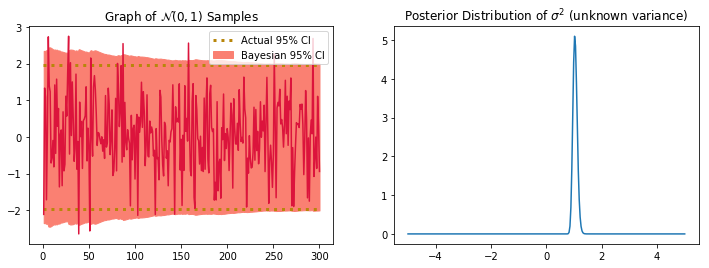

In [199]:
theta = 0 # this part is known
prior_observations_count,prior_observations_avgsqdev = 50, 1.3 # nu_0 and sigma_0 squared, respectively
size = 300 # size of the random sample

y = np.random.normal(size=size) # random standard normal sample
actual_95_CI = scipy.stats.norm.ppf(0.975) # critical value for actual 95% ci (we only need one due to symmetry)
t = np.arange(1,len(y)+1) # I called this the input vector (vector of x coords)

df = t + prior_observations_count # starting here, it reflects the math done above
mu_hat = theta 
sigma_hat = pow((prior_observations_count*prior_observations_avgsqdev + np.cumsum((y-theta)**2))/df,0.5)

posterior = scipy.stats.invgamma(a=(prior_observations_count+len(y))/2,
loc=0,scale=(prior_observations_count*prior_observations_avgsqdev + np.sum((y-theta)**2))/2) 

predictive_posterior = scipy.stats.t(df=df,loc=mu_hat,scale=sigma_hat) # ending here, it reflects the math done above

fig, ax = plt.subplots(1, 2,figsize=(12,4)) 
ax[0].plot([0,len(y)],[-actual_95_CI,-actual_95_CI],color='darkgoldenrod',linestyle=':',linewidth=3,label='Actual 95% CI'); # actual lower CI
ax[0].plot([0,len(y)],[actual_95_CI,actual_95_CI],color='darkgoldenrod',linestyle=':',linewidth=3); # actual upper CI
ax[0].plot(t,y,color='crimson'); # plot sample
ax[0].fill_between(t,predictive_posterior.ppf(0.025),predictive_posterior.ppf(0.975),color='salmon',label='Bayesian 95% CI'); # bayesian CI
ax[0].set_title(r'Graph of $\mathcal{N}(0,1)$ Samples')
ax[0].legend()
ax[1].plot(np.linspace(-5,5,300),posterior.pdf(np.linspace(-5,5,300)))
ax[1].set_title(r'Posterior Distribution of $\sigma^2$ (unknown variance)')


print('Our best guess for the variance given the data (from a bayesian paradigm) is now',posterior.ppf(0.5))
print('Our best guess for the variance given the data (from a frequentist paradigm) is now',np.var(y))
print('The actual variance is',1)

## Estimating Rate Parameter of Poisson Model

Here I repeat again the procedure for the past 2 sections, but now I estimate the rate parameter $\theta$. I derive the predictive posterior density of a new observation $\tilde{y}$ given multiple previous observations $y$ because the book showcases just a prior predictive distribution:

$$p(\tilde{y}|y) = \int p(\tilde{y}|\theta)p(\theta|y)\text{d}\theta = \int\frac{\theta^\tilde{y}}{\tilde{y}!}\exp(-\theta)\frac{(\beta+n)^{\alpha+n\bar{y}}}{\Gamma(\alpha +n\bar{y})}\theta^{\alpha + n\bar{y} -1}\exp(-(\beta+n)\theta)\text{d}\theta$$

Ignoring constants and focusing on the relevant terms in the integral, we get:

$$\propto \int_{0}^{\infty}\exp(-(\beta + n + 1)\theta)\theta^{\alpha + n\bar{y} + \tilde{y}-1}\text{d}\theta = \frac{\overbrace{\Gamma(\alpha + n\bar{y} + \tilde{y})}^{\Gamma(\hat{\alpha})}}{\underbrace{(\beta + n+ 1)^{\alpha + n\bar{y} + \tilde{y}}}_{\hat{\beta}^\hat{\alpha}}}\overbrace{\int_{0}^{\infty}\Gamma(\hat{\alpha},\hat{\beta})\text{d}\theta}^{=1}$$

Finally,
$$p(\tilde{y}|y) = \frac{(\alpha+n\bar{y}+\tilde{y}-1)!}{\tilde{y}!(\alpha + n\bar{y} -1)!}\frac{(\beta+n)^{\alpha+n\bar{y}}}{(\beta+n+1)^{\alpha+n\bar{y}+\tilde{y}}} = \binom{\alpha+n\bar{y}+\tilde{y}-1}{\tilde{y}}\left(\frac{\beta+n}{\beta +n+1}\right)^{\alpha+n\bar{y}}\left(\frac{1}{\beta+n+1}\right)^{\tilde{y}} = \text{Neg-Bin}(\overbrace{\alpha+n\bar{y}}^{\hat{\alpha}},\overbrace{\beta + n}^{\hat{beta}})$$

And the posterior distribution is given on page 44. Feel free to change ``prior_count``,``prior_observations``, and ``size``.

Our best guess for the rate parameter given the data (from a bayesian paradigm) is now 4.9911111169258895
Our best guess for the rate parameter given the data (from a frequentist paradigm) is now 5.14
The actual rate parameter is 5


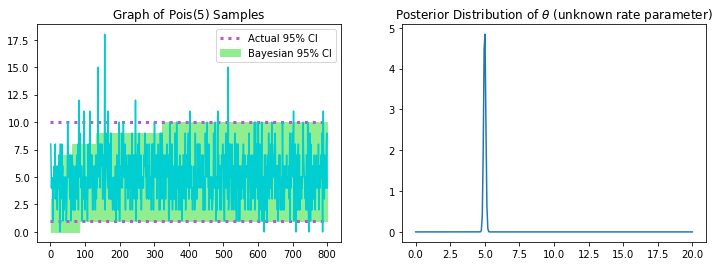

In [4]:
theta = 5 # rate parameter for a poisson distribution, this doesn't change
prior_count,prior_observations = 5,25 # alpha-1 and beta, respectively
size = 800

y = np.random.poisson(lam=theta,size=size) # random poisson sample
upper_95_CI = scipy.stats.poisson(mu=theta).ppf(0.975) # 97.5th percentile
lower_95_CI = scipy.stats.poisson(mu=theta).ppf(0.025) # 2.5th percentile
t = np.arange(1,len(y)+1) # I called this the input vector (vector of x coords)

alpha_hat = 1+prior_count + np.cumsum(y) # starting here, it reflects the math done above
beta_hat = prior_observations + np.arange(1,len(y)+1)

posterior = scipy.stats.gamma(a=alpha_hat[-1],scale=1/beta_hat[-1])
predictive_posterior = scipy.stats.nbinom(p=(beta_hat/(beta_hat+1)),n=alpha_hat) # ending here, it reflects the math doen above

fig, ax = plt.subplots(1, 2,figsize=(12,4)) 
ax[0].plot([0,len(y)],[lower_95_CI,lower_95_CI],color='mediumorchid',linestyle=':',linewidth=3,label='Actual 95% CI'); # approximate lower CI
ax[0].plot([0,len(y)],[upper_95_CI,upper_95_CI],color='mediumorchid',linestyle=':',linewidth=3); # approximate upper CI
ax[0].plot(t,y,color='darkturquoise'); # plot sample
ax[0].fill_between(t,predictive_posterior.ppf(0.025),predictive_posterior.ppf(0.975),color='lightgreen',label='Bayesian 95% CI'); # bayesian CI
ax[0].set_title(r'Graph of $\mathrm{Pois}(5)$ Samples')
ax[0].legend()
ax[1].plot(np.linspace(0,20,300),posterior.pdf(np.linspace(0,20,300)))
ax[1].set_title(r'Posterior Distribution of $\theta$ (unknown rate parameter)')

print('Our best guess for the rate parameter given the data (from a bayesian paradigm) is now',posterior.ppf(0.5))
print('Our best guess for the rate parameter given the data (from a frequentist paradigm) is now',np.mean(y))
print('The actual rate parameter is',5)